Distribuição de probabilidade 3
===============================



## Distribuições usando o `scipy`



O `scipy` já possui diversas distribuições [implementadas](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) (tanto contínuas quanto discretas). Vamos ver como exemplo a distribuição normal.

Primeiramente devemos instanciar a distribuição. Neste caso, os argumentos `loc` e `scale` recebem a média e o desvio padrão, respectivamente. Se não passar estes argumentos, você receberá a versão padrão da distribuição normal.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

MEDIA = 1
DESV_PADRAO = 2

dist_normal = stats.norm(loc=MEDIA, scale=DESV_PADRAO)

Podemos extrair estatísticas da distribuição recém-criada.



In [2]:
print("Média:", dist_normal.mean())
print("Variância:", dist_normal.var())
print("Desvio padrão:", dist_normal.std())
print("Mediana:", dist_normal.median())

Média: 1.0
Variância: 4.0
Desvio padrão: 2.0
Mediana: 1.0


Podemos calcular a pdf para diferentes valores de $x$.



In [3]:
print(dist_normal.pdf(-1))
print(dist_normal.pdf(5.5))

0.12098536225957168
0.01586982591783371


Podemos calcular a cdf para diferentes valores de $x$.



In [4]:
print(dist_normal.cdf(-1))
print(dist_normal.cdf(5.5))

0.15865525393145707
0.9877755273449553


Dado um percentil $p \in [0,1]$, podemos computar o valor de $\eta(p)$ como visto no notebook anterior (é o `ppf` no `scipy`, vem de *percent point function*).



In [5]:
print(dist_normal.ppf(0.1))
print(dist_normal.ppf(0.5))
print(dist_normal.ppf(0.7))
print(dist_normal.ppf(0.99))

-1.5631031310892007
1.0
2.0488010254160813
5.6526957480816815


Absolutamente nada nos impede de plotar a pdf da distribuição.



Text(0, 0.5, 'pdf')

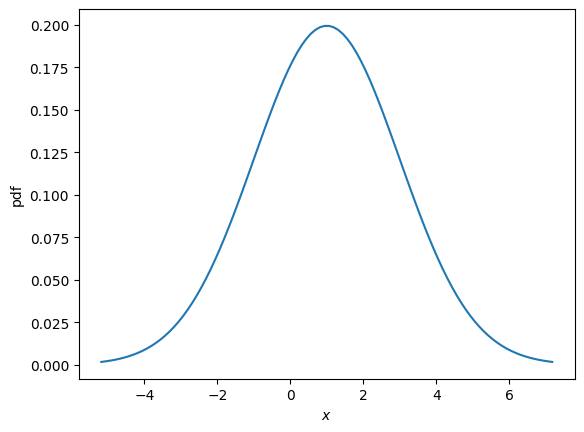

In [6]:
x = np.linspace(dist_normal.ppf(0.001), dist_normal.ppf(0.999), 100)
y = dist_normal.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Também podemos plotar a cdf.



Text(0, 0.5, 'cdf')

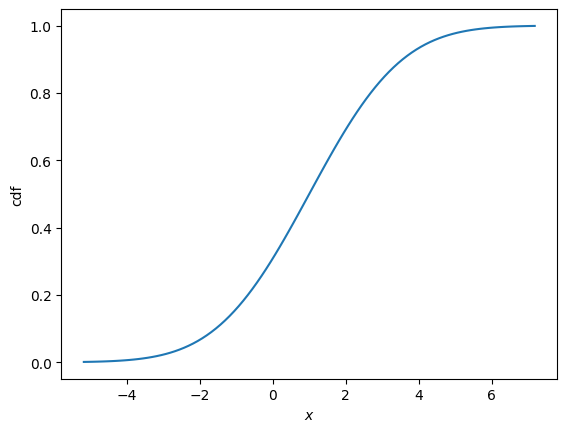

In [7]:
x = np.linspace(dist_normal.ppf(0.001), dist_normal.ppf(0.999), 100)
y = dist_normal.cdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("cdf")

## Sorteando números de uma pdf



Uma pdf pode ser utilizada para sortear números que seguem a distribuição.



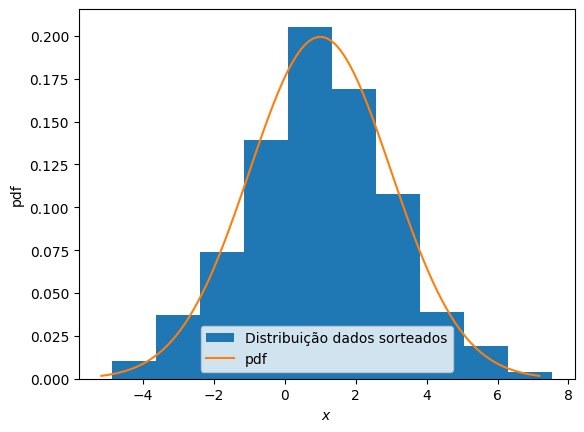

In [8]:
N = 1000

valores = dist_normal.rvs(size=N)

x = np.linspace(dist_normal.ppf(0.001), dist_normal.ppf(0.999), 100)
y = dist_normal.pdf(x)

figura, eixo = plt.subplots()
eixo.hist(valores, density=True, label="Distribuição dados sorteados")
eixo.plot(x, y, label="pdf")
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")
eixo.legend()

## A distribuição exponencial



### Densidade de probabilidade (pdf)



Uma variável aleatória $X$ segue a distribuição exponencial com parâmetro $\lambda > 0$ se sua pdf é dada por:

$$
f(x; \lambda)=\begin{cases}
\lambda e^{-\lambda x} & x \geq 0\\
0 & \textrm{caso contrário}
\end{cases}
$$

Temos que a média da distribuição exponencial é igual à sua variância e vale $1/\lambda$.

Esta é uma distribuição muito usada na ciência e na engenharia. Da mesma forma que a distribuição normal está relacionada à distribuição Binomial, a distribuição exponencial está relacionada com a distribuição de Poisson. Desta forma, a distribuição exponencial pode ser utilizada em estudos de onde ocorrem eventos sucessivos que têm uma certa taxa de ocorrência.

Vamos ver um exemplo.



In [9]:
MEDIA = 1

dist_exp = stats.expon(scale=MEDIA)

print("Média:", dist_exp.mean())
print("Variância:", dist_exp.var())
print("Desvio padrão:", dist_exp.std())
print("Mediana:", dist_exp.median())

Média: 1.0
Variância: 1.0
Desvio padrão: 1.0
Mediana: 0.6931471805599453


Gráfico da pdf.



Text(0, 0.5, 'pdf')

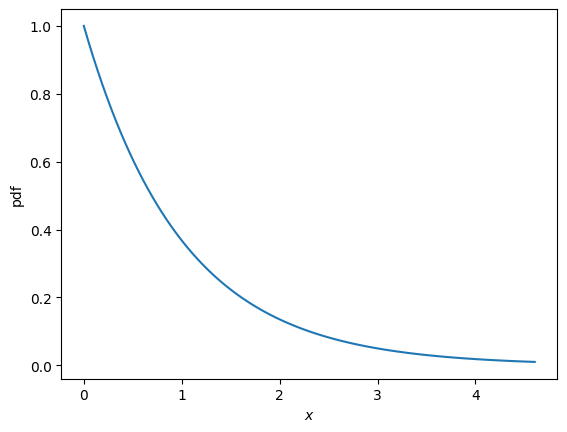

In [10]:
x = np.linspace(0, dist_exp.ppf(0.99), 100)
y = dist_exp.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

### Densidade acumulada (cdf)



Pela definição da cdf, temos que $F(t; \lambda) = \int_{-\infty}^t f(x; \lambda)\, \mathrm{d}x$, logo

$$
F(t; \lambda)=\begin{cases}
1 - e^{-\lambda t} & t \geq 0\\
0 & \textrm{caso contrário}
\end{cases}
$$

Por conta disso, temos que

$$
P(X \geq t) = 1 - F(t;\lambda) = e^{-\lambda t}
$$

Gráfico da cdf.



Text(0, 0.5, 'cdf')

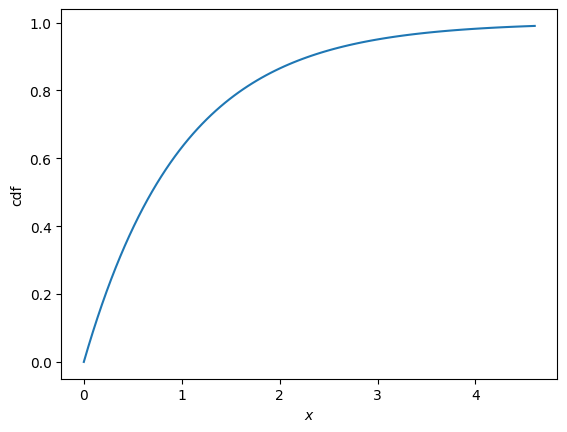

In [11]:
x = np.linspace(0, dist_exp.ppf(0.99), 100)
y = dist_exp.cdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("cdf")

### Exemplo 1



Em uma empresa de fabricação de celulares, é observado que empresa produz 5 celulares com defeito para cada hora de produção. A distribuição do <u>tempo em horas entre dois celulares defeituosos</u> serem produzidos segue a pdf da distribuição exponencial com $\lambda = 1/5$ (o que equivale a uma média de $1/\lambda= 5$ defeitos por hora) Vamos ver abaixo a pdf deste exemplo.



Text(0, 0.5, 'pdf')

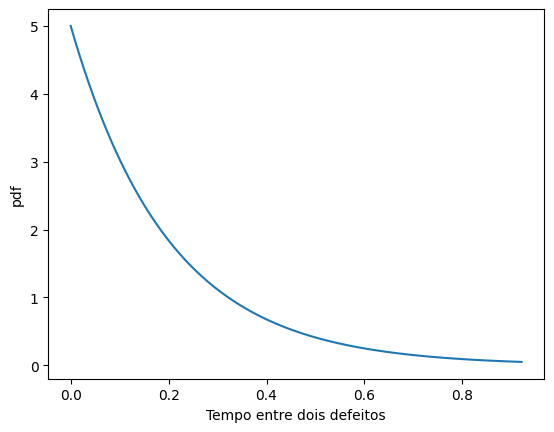

In [12]:
dist_exp = stats.expon(scale=1/5)

x = np.linspace(0, dist_exp.ppf(0.99), 100)
y = dist_exp.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("Tempo entre dois defeitos")
eixo.set_ylabel("pdf")

### Exemplo 2



Considerando a pdf do exemplo 1, qual é a chance de demorar um tempo maior que 2 horas entre dois defeitos? Isto é, qual é $P(X > 2)$? Observe que $P(X > 2) = 1 - P(X \leq 2)$ e que podemos obter $P(X \leq 2)$ pela cdf da distribuição. Logo



In [13]:
print(f"A probabilidade é de {(1 - dist_exp.cdf(2)) * 100}%")

A probabilidade é de 0.004539992976249074%


### Exemplo 3



Imagine um produto que a probabilidade dele quebrar segue uma distribuição exponencial com $\lambda = 10$ ao longo do tempo. Digamos que você observou este produto no tempo $t_0$ e ele não estava quebrado. Sabendo disso, qual deve ser a nova distribuição de probabilidade de quebrar deste produto?

Este é um problema de probabilidade condicional. Em outras palavras, o problema pergunta: qual é $P(X \geq t + t_0 | X \geq t_0)$?

Temos que

$$
P(X \geq t + t_0 | X \geq t_0) = \frac{P(X \geq t + t_0) \cap P(X \geq t_0)}{P(X \geq t_0)}.
$$

Neste momento, deve estar claro para você que neste caso

$$
P(X \geq t + t_0) \cap P(X \geq t_0) = P(X \geq t + t_0),
$$

pois para $X$ sobreviver $t + t_0$ ele necessariamente deve sobreviver até $t_0$.

Desta forma, temos

$$
P(X \geq t + t_0 | X \geq t_0) =
\frac{P(X \geq t + t_0)}{P(X \geq t_0)} =
\frac{1 - F(t+t_0; \lambda)}{1 - F(t_0; \lambda)} =
\frac{e^{-\lambda (t + t_0)}}{e^{-\lambda t_0}} =
e^{-\lambda t} =
P(X \geq t).
$$

Observou algo interessante? Temos aqui a propriedade de &ldquo;falta de memória&rdquo; da distribuição exponencial. Esta propriedade nos diz que não importa o momento que estamos observando a nossa variável aleatória, ela sempre segue a mesma distribuição &ldquo;como se ela não se recordasse do que ocorreu antes&rdquo;.



## A distribuição Gama



Uma variável aleatória $X$ segue a distribuição Gama com parâmetros $\alpha > 0$ e $\beta > 0$ se sua pdf é dada por:

$$
f(x; \alpha, \beta)=\begin{cases}
\frac{1}{\beta^\alpha \Gamma(\alpha)} x^{\alpha -1} e^{-\frac{x}{\beta}} & x \geq 0\\
0 & \textrm{caso contrário}
\end{cases}
$$

Nesta equação, sabendo que $\alpha > 0$, temos que a função Gama é computada por

$$
\Gamma(\alpha) = \int_0^\infty e^{-x} x^{\alpha -1} \, \mathrm{d}x.
$$

**Nota**: a função Gama pode ser considerada a generalização da função fatorial, sendo que:

-   $\Gamma(n) = (n - 1)!$, se $n$ é um número inteiro positivo;

-   $\Gamma(\alpha) = \alpha \cdot \Gamma(\alpha - 1)$, para $\alpha > 1$.

**Nota 2**: A distribuição exponencial é um caso particular da distribuição Gama sendo que $\alpha = 1$ e $\beta = 1/\lambda$, com $\lambda > 0$.

Temos que a média da distribuição Gama é $\alpha \beta$ e a sua variância é $\alpha \beta^2$.

Segundo o Wikipédia: &ldquo;Considere uma sequência de eventos, com o tempo de espera para cada evento sendo uma distribuição exponencial com taxa $\lambda = 1 /\beta$. Então, o tempo de espera para a ocorrência do $n$​-ésimo evento é a distribuição gama com forma inteira $\alpha = n$. Essa construção da distribuição gama permite que ela modele uma ampla variedade de fenômenos em que vários subeventos, cada um levando tempo com distribuição exponencial, devem ocorrer em sequência para que um evento principal ocorra&rdquo;. Ver exemplos [aqui](https://en.wikipedia.org/wiki/Gamma_distribution#Occurrence_and_applications).

Vamos ver um exemplo.



In [14]:
MEDIA = 1
DESV_PADRAO = 1

beta = DESV_PADRAO ** 2 / MEDIA
alfa = MEDIA / beta

dist_gama = stats.gamma(alfa, scale=beta)

print("Alfa:", alfa)
print("Beta:", beta)

print("Média:", dist_gama.mean())
print("Variância:", dist_gama.var())
print("Desvio padrão:", dist_gama.std())
print("Mediana:", dist_gama.median())

Alfa: 1.0
Beta: 1.0
Média: 1.0
Variância: 1.0
Desvio padrão: 1.0
Mediana: 0.6931471805599455


Gráfico da pdf.



Text(0, 0.5, 'pdf')

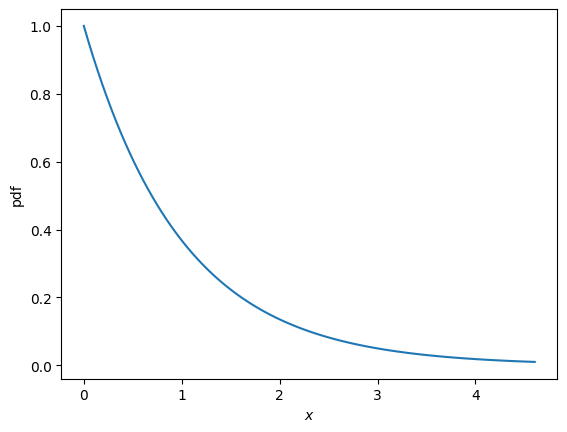

In [15]:
x = np.linspace(0, dist_gama.ppf(0.99), 100)
y = dist_gama.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Gráfico da cdf.



Text(0, 0.5, 'cdf')

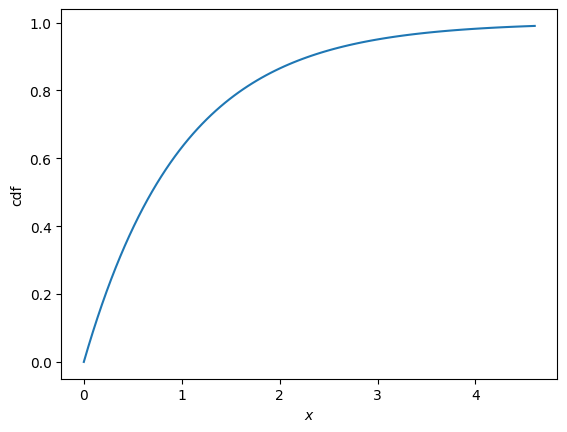

In [16]:
x = np.linspace(0, dist_gama.ppf(0.99), 100)
y = dist_gama.cdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("cdf")

## A distribuição qui-quadrado



Uma variável aleatória $X$ segue a distribuição qui-quadrado com parâmetro $\nu > 0$ se sua pdf é dada por:

$$
f(x; \nu)=\begin{cases}
\frac{1}{2^{\nu / 2} \Gamma(\nu / 2)} x^{(\nu / 2) -1} e^{-x/2} & x \geq 0\\
0 & \textrm{caso contrário}
\end{cases}
$$

Trata-se da distribuição Gama com $\alpha = \nu / 2$ e $\beta = 2$. O parâmetro $\nu$ é chamado de grau de liberdade de $X$. Esta distribuição é frequentemente representada por $\chi^2$ e é muito importante por ser a base de diversos procedimentos de inferência estatística.



In [17]:
GRAUS_DE_LIBERDADE = 3

dist_chi2 = stats.chi2(GRAUS_DE_LIBERDADE)

print("Média:", dist_chi2.mean())
print("Variância:", dist_chi2.var())
print("Desvio padrão:", dist_chi2.std())
print("Mediana:", dist_chi2.median())

Média: 3.0
Variância: 6.0
Desvio padrão: 2.449489742783178
Mediana: 2.3659738843753377


Gráfico da pdf.



Text(0, 0.5, 'pdf')

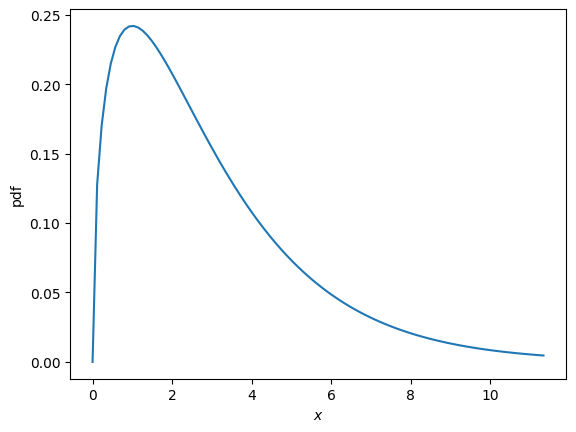

In [18]:
x = np.linspace(0, dist_chi2.ppf(0.99), 100)
y = dist_chi2.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Gráfico da cdf.



Text(0, 0.5, 'cdf')

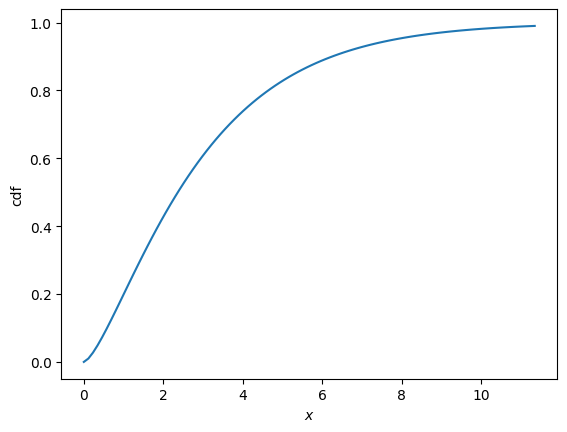

In [19]:
x = np.linspace(0, dist_chi2.ppf(0.99), 100)
y = dist_chi2.cdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("cdf")

## A distribuição t de Student



Uma variável aleatória $X$ segue a distribuição $t$ de Student com parâmetro $\nu > 0$ se sua pdf é dada por:

$$
f(t; \nu) =
\frac{\Gamma ((\nu + 1) / 2)} {\Gamma (\nu / 2) \sqrt{\pi \nu}} \left(1 + \frac{t^2}{\nu} \right) ^{-\frac{\nu + 1}{2}}
$$

O parâmetro $\nu$ é chamado de grau de liberdade de $X$.

A distribuição $t$ de Student é uma generalização da distribuição normal padrão, sendo que para $\nu \rightarrow \infty$ esta distribuição é igual a distribuição normal padrão. Quando $\nu = 1$, esta distribuição tem um nome especial: distribuição de Cauchy.

A distribuição $t$ de Student é utilizada em diversas análises estatísticas como por exemplo inferência de intervalos de confiança e certos testes de hipóteses.



In [20]:
GRAUS_DE_LIBERDADE = 5

dist_t = stats.t(GRAUS_DE_LIBERDADE)

print("Média:", dist_t.mean())
print("Variância:", dist_t.var())
print("Desvio padrão:", dist_t.std())
print("Mediana:", dist_t.median())

Média: 0.0
Variância: 1.6666666666666667
Desvio padrão: 1.2909944487358056
Mediana: 6.976003623003317e-17


Gráfico da pdf.



Text(0, 0.5, 'pdf')

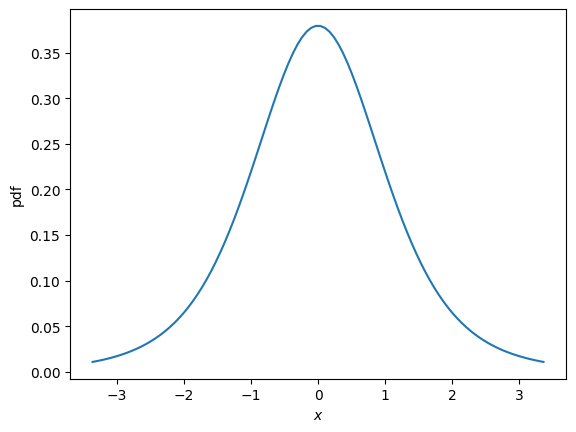

In [21]:
x = np.linspace(dist_t.ppf(0.01), dist_t.ppf(0.99), 100)
y = dist_t.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Gráfico da pdf comparando com a distribuição normal padrão



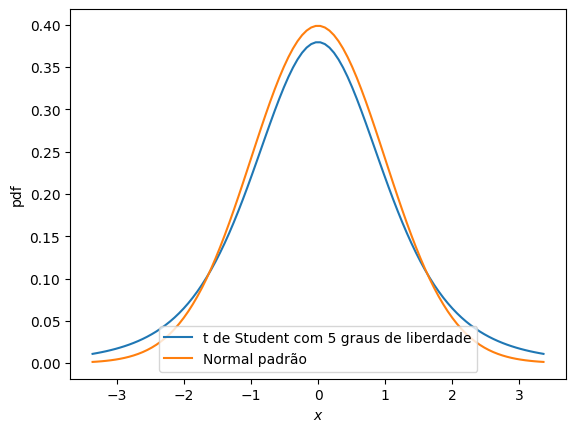

In [22]:
x = np.linspace(dist_t.ppf(0.01), dist_t.ppf(0.99), 100)
y = dist_t.pdf(x)
y2 = stats.norm.pdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y, label=f"t de Student com {GRAUS_DE_LIBERDADE} graus de liberdade")
eixo.plot(x, y2, label="Normal padrão")

eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")
eixo.legend()

Gráfico da cdf.



Text(0, 0.5, 'cdf')

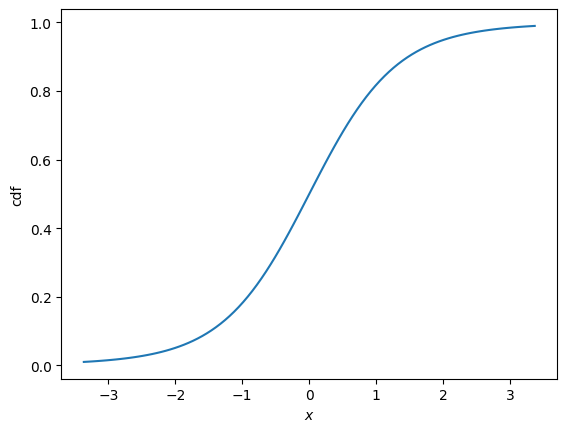

In [23]:
x = np.linspace(dist_t.ppf(0.01), dist_t.ppf(0.99), 100)
y = dist_t.cdf(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("cdf")

## Outras distribuições



O capítulo 4.5 da referência [1] trás outras distribuições que valem a pena serem estudadas, incluindo a distribuição de Weibull, a distribuição lognormal e a distribuição beta.



## Gráficos de probabilidade



Suponha que fomos ao laboratório e coletamos 100 medidas em um equipamento. Vamos representar estas medidas como a variável aleatória $X$ abaixo.



In [24]:
X = [-0.79430676, -0.63578192, -1.13297955, -0.73035307, -0.09589236,
     -0.40471592,  0.3100055 , -0.96413329, -1.72159577,  3.29172357,
      4.51335353,  0.06530489,  3.61202999,  0.52961094, -1.95976643,
      3.59937406,  2.11970479,  1.32003163, -0.96700903,  0.58830343,
     -1.47270802, -1.71308307,  0.61026299,  0.21738029,  1.60936043,
      1.9009532 ,  0.46772564,  1.091924  ,  3.62558815, -0.8093654 ,
      0.99334107,  0.37196861,  0.48842554,  0.11559272, -0.56747525,
     -0.48691929, -0.91669826,  1.24114991,  2.0708496 , -0.88650261,
     -0.01415251, -1.42836697, -0.7019621 , -0.24524646,  0.83333759,
      1.03869967,  0.25853012,  0.65992578, -0.21182602,  0.64061627,
     -0.37813365, -1.20474724,  0.71478971,  0.34131459, -1.933705  ,
     -3.04608036, -0.82676522, -2.44354719,  0.58311734,  0.42187919,
      0.92547755,  0.76318113,  0.25683466, -0.07598671,  0.03141201,
      1.15107736,  0.85381809, -0.31494163,  1.72792258, -0.91236041,
     -0.43616626,  0.13597211,  0.80594727, -1.09343114,  0.46780491,
     -0.58613197, -0.92581991,  2.71767779,  0.34217283, -0.54256973,
     -1.4767384 ,  0.34479024,  0.97345561,  1.26362274, -0.08981039,
      0.9307915 ,  1.96685811, -0.26599663, -1.21785043,  2.43912071,
     -3.37282547, -0.59827578, -0.72230624,  0.380523  ,  1.97448253,
     -0.31084394,  0.97698679,  0.98959649, -1.36214975,  0.26994833,]

Qual é a distribuição que podemos usar para nossa variável aleatória? É interessante sabermos a distribuição para tentar entender melhor o fenômeno por trás da medida do equipamento.

Um bom primeiro passo é plotar o histograma.



Text(0, 0.5, 'pdf')

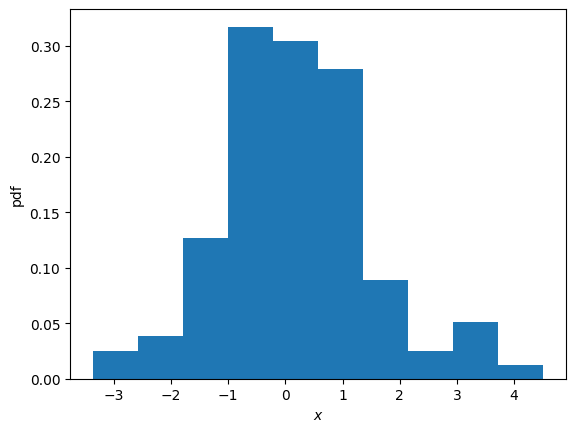

In [25]:
figura, eixo = plt.subplots()
eixo.hist(X, density=True)
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Do histograma, vemos que nossos dados seguem uma distribuição que lembra vagamente a normal ou a $t$ de Student.

Uma estratégia para tentar entender qual é a distribuição da variável aleatória sendo estudada é o chamado *gráfico de probabilidades*. Para gerar este gráfico, seguimos os passos abaixo:

1.  Escolher uma distribuição que será testada.

2.  Gerar uma lista de mesmo tamanho da variável aleatória. Cada elemento $i$ da lista deve ser preenchido com o valor $(i - 0,5) / N$, onde $N$ é o número de itens da variável aleatória sendo estudada. Cada um destes valores equivale a um percentil $p$.

3.  Computar os valores $\eta(p)$ para cada item $p$ na lista gerada no passo 2. O valor de $\eta$ deve ser computado seguindo a distribuição escolhida no passo 1. Armazenar estes valores em uma lista que chamaremos de $y$.

4.  Criar a lista que chamaremos de $x$ que será os valores da variável aleatória em ordem crescente.

5.  Graficar $y$ por $x$.

6.  Quanto mais próximo os pontos estiverem da linha da identidade (isto é, $y = x$), mais confiante você está de que a variável aleatória segue a distribuição escolhida no passo 1.

Vamos fazer um teste com a distribuição normal.



Text(0, 0.5, 'pdf')

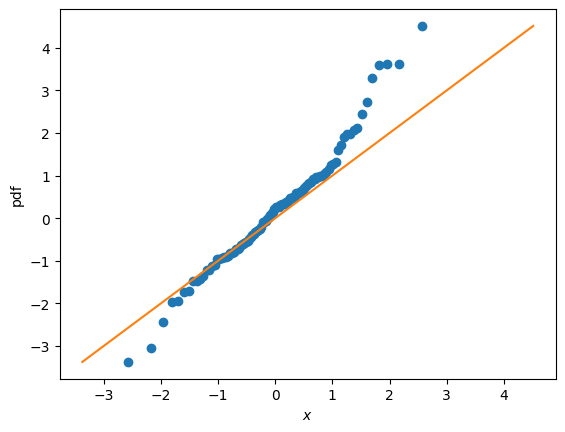

In [26]:
MEDIA = 0
DESV_PADRAO = 1
dist = stats.norm(loc=MEDIA, scale=DESV_PADRAO)

percentis = [(i - 0.5) / len(X) for i in range(1, len(X) + 1)]
etas = dist.ppf(percentis)

figura, eixo = plt.subplots()
eixo.plot(etas, sorted(X), ls="none", marker="o")
eixo.plot([min(X), max(X)], [min(X), max(X)])
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Vamos fazer um teste com a distribuição $t$ de Student.



Text(0, 0.5, 'pdf')

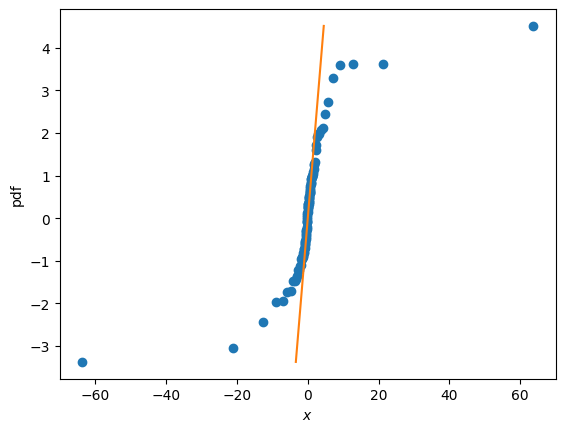

In [27]:
GRAUS_DE_LIBERDADE = 1
dist = stats.t(GRAUS_DE_LIBERDADE)

percentis = [(i - 0.5) / len(X) for i in range(1, len(X) + 1)]
etas = dist.ppf(percentis)

figura, eixo = plt.subplots()
eixo.plot(etas, sorted(X), ls="none", marker="o")
eixo.plot([min(X), max(X)], [min(X), max(X)])
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")

Podemos levantar estes gráficos usando a função `probplot` do `scipy`. **Nota**: a função `probplot` computa a lista $y$ discutida acima de maneira ligeiramente diferente.

Vamos testar com a distribuição normal.



Coeficiente de correlação de Pearson: 0.9853194915120197


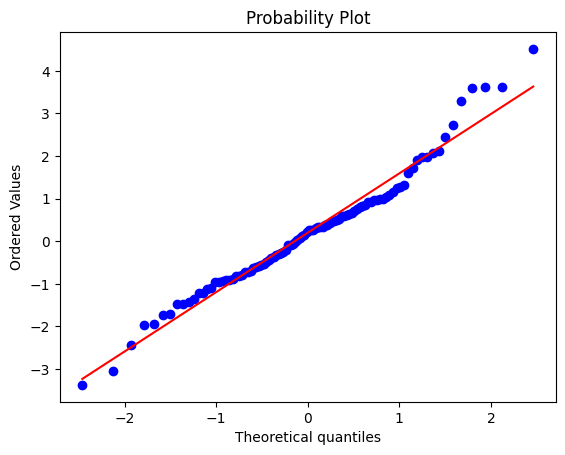

In [28]:
MEDIA = 0
DESV_PADRAO = 1
DISTRIBUICAO = stats.norm(loc=MEDIA, scale=DESV_PADRAO)

figura, eixo = plt.subplots()
(etas, X_ordenado), (c_angular, c_linear, r) = stats.probplot(
    X, dist=DISTRIBUICAO, plot=eixo
)

print(f"Coeficiente de correlação de Pearson: {r}")

Vamos testar com a distribuição $t$ de Student.



Coeficiente de correlação de Pearson: 0.761842071103344


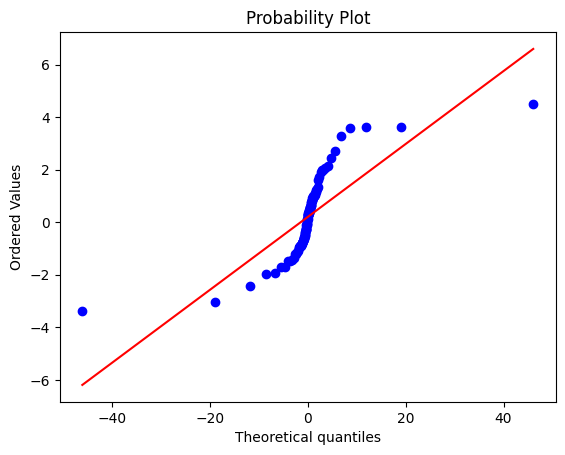

In [29]:
GRAUS_DE_LIBERDADE = 1
DISTRIBUICAO = stats.t(GRAUS_DE_LIBERDADE)

figura, eixo = plt.subplots()
(etas, X_ordenado), (c_angular, c_linear, r) = stats.probplot(
    X, dist=DISTRIBUICAO, plot=eixo
)

print(f"Coeficiente de correlação de Pearson: {r}")

## Ajustando uma distribuição



Com o `scipy` é relativamente simples ajustar uma distribuição a uma variável aleatória. Do teste acima, observamos que a $t$ de Student parece que se ajusta melhor aos dados. Vamos então testar um ajuste desta distribuição.



Média: 0.12852167658955424
Variância: 2.003632332068608
Desvio padrão: 1.4154972031299136
Mediana: 0.12852167658955432


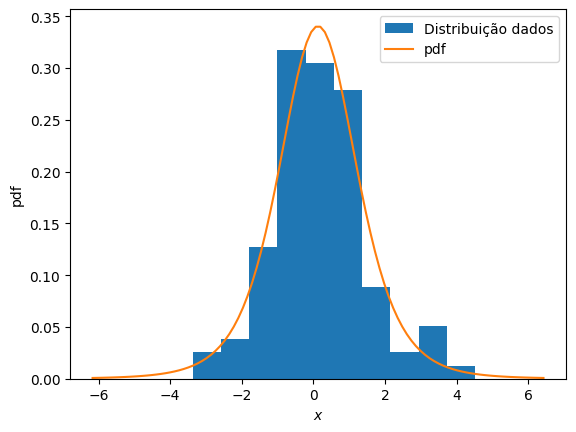

In [30]:
DISTRIBUICAO = stats.t

parametros = DISTRIBUICAO.fit(X)
dist = DISTRIBUICAO(*parametros)

print("Média:", dist.mean())
print("Variância:", dist.var())
print("Desvio padrão:", dist.std())
print("Mediana:", dist.median())

x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)
y = dist.pdf(x)

figura, eixo = plt.subplots()
eixo.hist(X, density=True, label="Distribuição dados")
eixo.plot(x, y, label="pdf")
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")
eixo.legend()

Nada impede que testemos também a distribuição normal.



Média: 0.1993762557
Variância: 1.9205702808061744
Desvio padrão: 1.385846413137536
Mediana: 0.1993762557


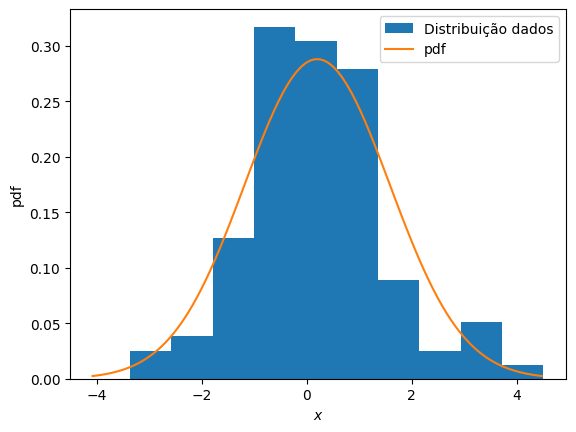

In [31]:
DISTRIBUICAO = stats.norm

parametros = DISTRIBUICAO.fit(X)
dist = DISTRIBUICAO(*parametros)

print("Média:", dist.mean())
print("Variância:", dist.var())
print("Desvio padrão:", dist.std())
print("Mediana:", dist.median())

x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)
y = dist.pdf(x)

figura, eixo = plt.subplots()
eixo.hist(X, density=True, label="Distribuição dados")
eixo.plot(x, y, label="pdf")
eixo.set_xlabel("$x$")
eixo.set_ylabel("pdf")
eixo.legend()

## XKCD relevante



![img](https://imgs.xkcd.com/comics/t_distribution.png)

`Imagem: T Distribution (XKCD) disponível em https://xkcd.com/1347`



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  MORETTIN, Pedro A.; BUSSAB, Wilton de O. Estatística básica. 9ª edição. Saraiva Uni, 2017.

3.  Distribuições de probabilidade disponíveis no `scipy` [https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions)

4.  Distribuição Gama na Wikipédia [https://en.wikipedia.org/wiki/Gamma_distribution](https://en.wikipedia.org/wiki/Gamma_distribution)

5.  Distribuição $t$ de Student na Wikipédia [https://en.wikipedia.org/wiki/Student's_t-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution)

